In [4]:
# Exploratory Data Analysis (EDA) of Brent Oil Prices
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Set plotting style
sns.set_style('whitegrid')

# Define the path to the processed data
processed_data_path = os.path.join("..", "data", "processed", "brent_oil_clean.csv")

# Load the data
try:
    df = pd.read_csv(processed_data_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Processed data not found. Please run the data cleaning script in Task 1 first.")
    df = None

Data loaded successfully.


### 1. Visualizing the Raw Price Data

We will first plot the raw price data to observe any clear trends or major events. This data is likely non-stationary due to its clear upward and downward trends over time.

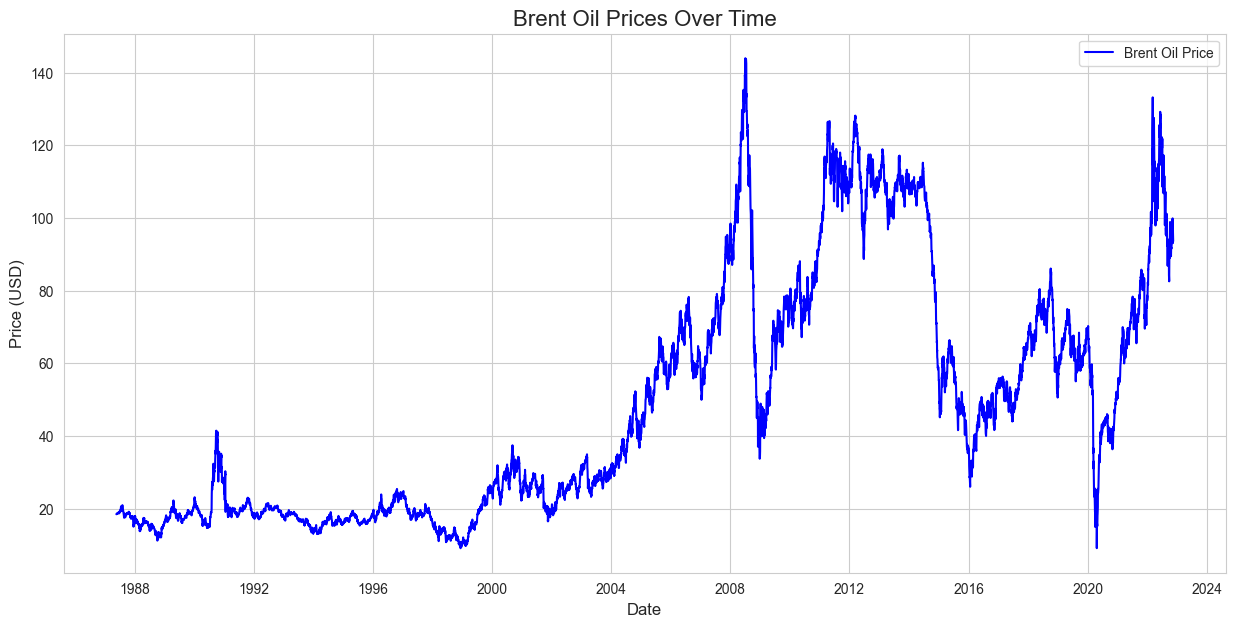

In [5]:
if df is not None:
    plt.figure(figsize=(15, 7))
    plt.plot(df.index, df['Price'], label='Brent Oil Price', color='blue')
    plt.title('Brent Oil Prices Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend()
    plt.show()

### 2. Analyzing Log Returns

To make the series stationary, we calculate the log returns. This transformation removes the overall trend and makes the data more suitable for our change point model.

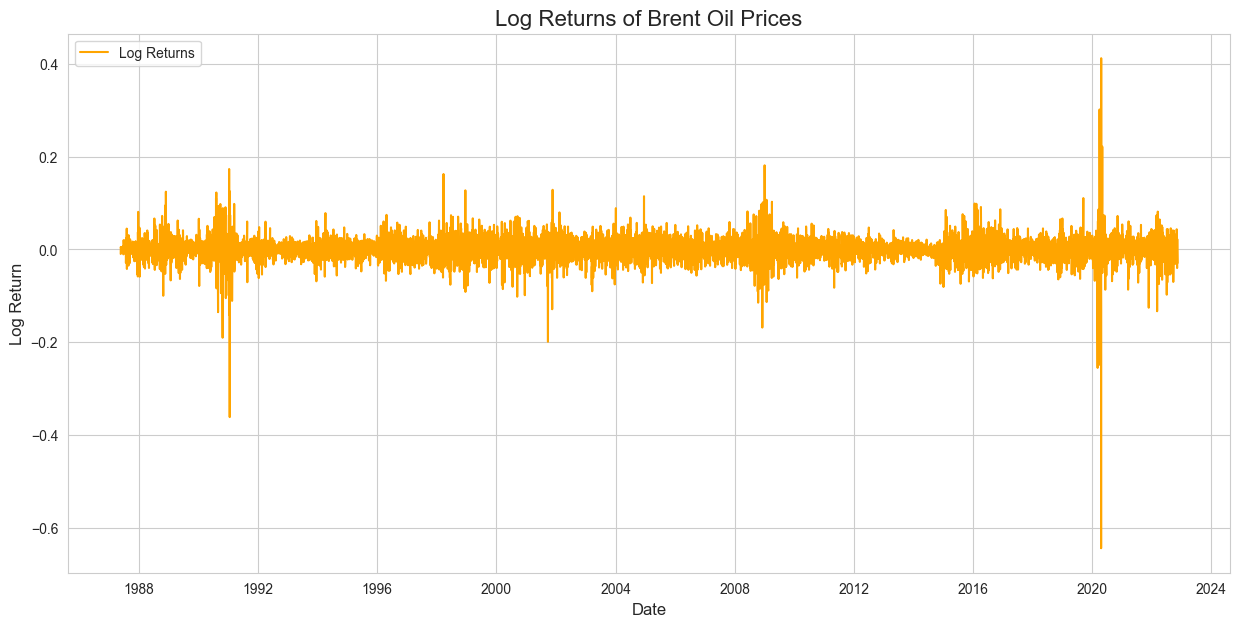

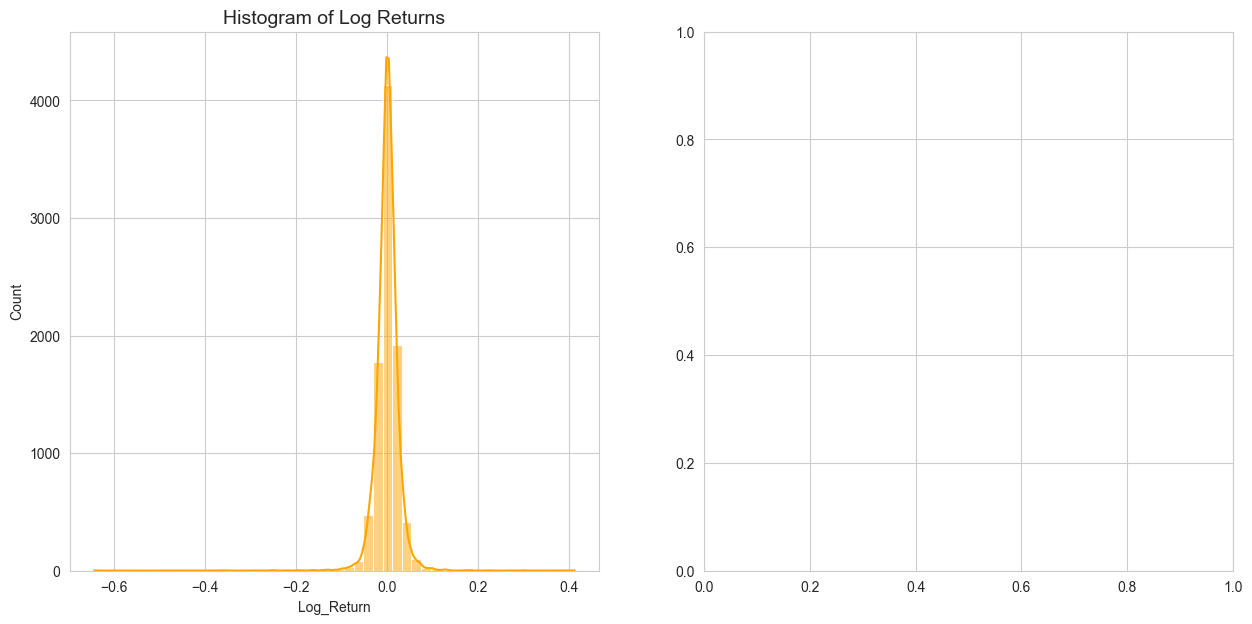

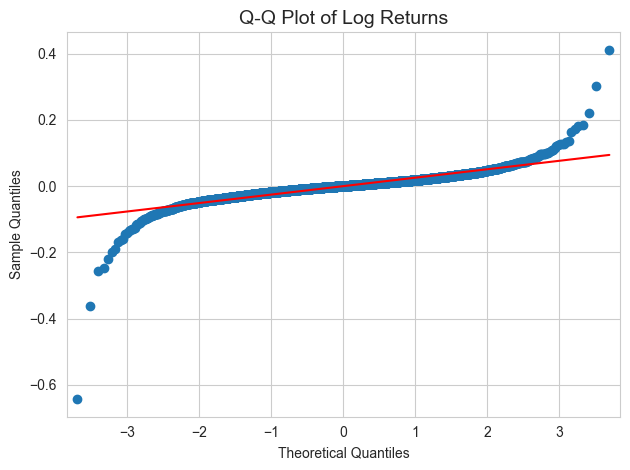

In [6]:
if df is not None:
    plt.figure(figsize=(15, 7))
    plt.plot(df.index, df['Log_Return'], label='Log Returns', color='orange')
    plt.title('Log Returns of Brent Oil Prices', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Log Return', fontsize=12)
    plt.legend()
    plt.show()

    # Plotting histogram and Q-Q plot for log returns to check for normality
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    sns.histplot(df['Log_Return'].dropna(), kde=True, bins=50, color='orange')
    plt.title('Histogram of Log Returns', fontsize=14)

    plt.subplot(1, 2, 2)
    sm.qqplot(df['Log_Return'].dropna(), line='s')
    plt.title('Q-Q Plot of Log Returns', fontsize=14)
    plt.tight_layout()
    plt.show()

### 3. Testing for Stationarity (Augmented Dickey-Fuller Test)

We will perform a formal statistical test to confirm that the log returns are indeed stationary. The Augmented Dickey-Fuller (ADF) test will be used. A low p-value (e.g., less than 0.05) suggests the series is stationary.

In [7]:
if df is not None:
    adf_test = adfuller(df['Log_Return'].dropna())
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.427113
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


### 4. Conclusion of EDA

Based on the visualizations and the ADF test, we can confirm that the log returns are a suitable input for our change point model, as they appear to be stationary. The raw price data, which is non-stationary, would not be appropriate for the model in its raw form.